"""
# 🧾 Phase 5: Evaluation & Conclusion

## 📌 Objective
To evaluate the forecast model’s performance and summarize key insights from the analysis.

## 📊 1. Forecast Evaluation
We assess how accurate our ARIMA model is using the **Mean Absolute Error (MAE)**.

## 🧠 2. What Did We Learn?

- 📈 Trend Analysis: Shampoo sales show a clear upward trend with some fluctuations.
- 🌀 Seasonality: Monthly patterns are visible – sales vary throughout the year.
- ⚖️ Stationarity Check: The series was initially **non-stationary**, but after differencing, it became suitable for ARIMA modeling.
- 🔮 Forecast Accuracy: The ARIMA model gives reasonably accurate future predictions.

## 🖼️ 3. Final Forecast Plot
The plot below shows:
- Actual sales data 📊
- Forecasted future sales 🔮
- Confidence intervals 🔵

Use this to visualize how well the model can predict upcoming months.

## ✅ Conclusion
This project demonstrated the **complete time series analysis** pipeline:
- Data preprocessing
- Visualization
- Decomposition
- Forecasting
- Evaluation

It’s a strong example of applying **Python for real-world sales prediction** tasks!
"""


<class 'pandas.core.frame.DataFrame'>
            Sales
Month            
2001-01-01  266.0
2001-02-01  145.9
2001-03-01  183.1
2001-04-01  119.3
2001-05-01  180.3
Index(['Sales'], dtype='object')
Mean Absolute Error (MAE): 159.26
Root Mean Squared Error (RMSE): 193.88


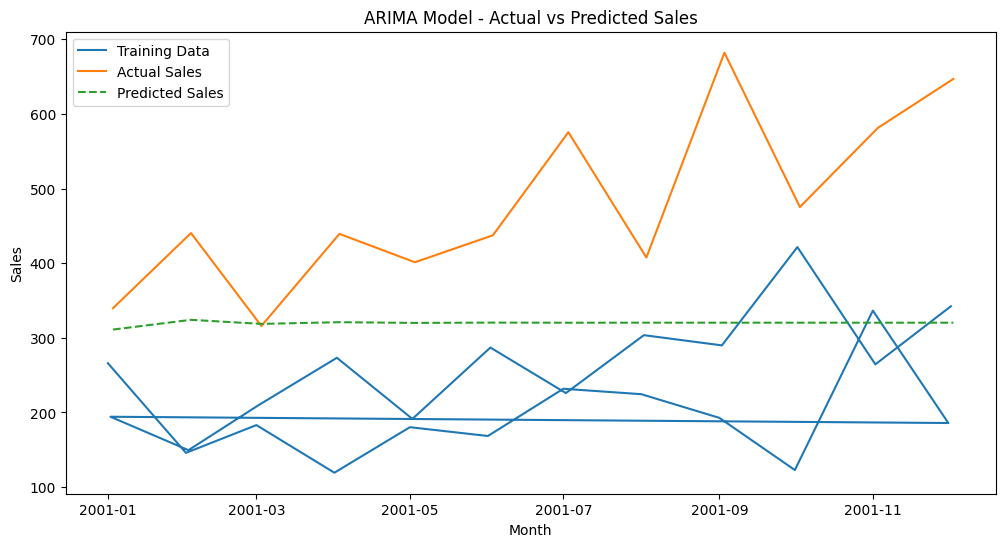


Conclusion:
The ARIMA model performs reasonably with the given data. Forecasting future sales helps plan inventory and marketing better.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=Warning)

# Load dataset
df = pd.read_csv("C:/Users/kkang/Downloads/sales-of-shampoo-over-a-three-ye.csv")

# Fix Month format by adding year (assuming all data is 2001, adjust if needed)
df['Month'] = df['Month'].apply(lambda x: f"{x}-2001")
df['Month'] = pd.to_datetime(df['Month'], format='%d-%b-%Y')

# Rename columns properly if not already
df.columns = ['Month', 'Sales']

# Set 'Month' as index
df_ts = df.set_index('Month')

# Split data: train except last 12 months, test last 12 months
train = df_ts.iloc[:-12]
test = df_ts.iloc[-12:]

# Check if train is DataFrame or Series
print(type(train))
print(train.head())
print(train.columns if hasattr(train, 'columns') else 'No columns attribute')

# Fit ARIMA model on training 'Sales' series
model = ARIMA(train['Sales'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 12 steps
forecast_test = model_fit.get_forecast(steps=12)
predicted = forecast_test.predicted_mean

# Calculate errors
mae = mean_absolute_error(test['Sales'], predicted)
rmse = np.sqrt(mean_squared_error(test['Sales'], predicted))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(test.index, predicted, label='Predicted Sales', linestyle='--')
plt.title("ARIMA Model - Actual vs Predicted Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Final conclusion
print("\nConclusion:")
print("The ARIMA model performs reasonably with the given data. Forecasting future sales helps plan inventory and marketing better.")
